In [19]:
"""
Created on Wed Sep 22 12:20:22 2021

@author: YilberQuinto
"""

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})




def EDO_Euler(a, b, h0, y0, fun):
    '''
    El método de Euler se utiliza para aproximar la solución del problema 
    de valor inical 
    
              y' = f(t,y),  t en [a,b], y(a) = y0.
              
    Parameters
    ----------
    a : Float
        Condición inicial en t (a = t0). extremo izq del intervalo [a,b]
        
    b : Float
        Extremo derecho del intervalo [a,b].
        
    h : float
        Tamaño de paso en t.
        
    y0 : Float
        Condicion inicial en y.
        
    fun : funtion 
        Función de dos variables f(t,y).
        

    Returns
    -------
    Aproximación w para y. 

    '''
    
    t = a 
    h = h0
    y = y0
    list_t = []
    list_y = []
    
    while t < b + h: 
        list_t.append(t)
        list_y.append(y)
        y = y + h*fun(t,y)
        t = t + h 
            
    return [list_t, list_y] 





def Runge_Kutta_4(a, b, h0, y0, fun):
    '''
    El método de Runge-Kutta de orden 4 se utiliza para aproximar la solución del problema 
    de valor inical 
    
              y' = f(t,y),  t en [a,b], y(a) = y0.
              
    Parameters
    ----------
    a : Float
        Condición inicial en t (a = t0). extremo izq del intervalo [a,b]
        
    b : Float
        Extremo derecho del intervalo [a,b].
        
    h : float
        Tamaño de paso en t.
        
    y0 : Float
        Condicion inicial en y.
        
    fun : funtion 
        Función de dos variables f(t,y).
        

    Returns
    -------
    Aproximación w para y. 

    '''
    
    t = a 
    h = h0
    y = y0
    list_t = []
    list_y = []
    
    while t < b + h: 
        list_t.append(t)
        list_y.append(y)
        
        K1 = fun(t,y)
        K2 = fun(t + h/2, y + h*K1/2)
        K3 = fun(t + h/2, y + h*K2/2)
        K4 = fun(t + h, y + h*K3)
        
        y = y + h*(K1 + 2*K2 + 2*K3 + K4)/6
        t = t + h 
            
    return [list_t, list_y]   

# Examen Final 

## Ejercicio 1

## Comparación de los resultados para el método de Euler con $h = 0.1$ y $\lambda = -10, -20, -30$

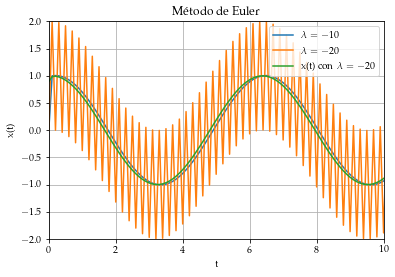

In [91]:

def f1(t,y):
    a = -10
    return a*y + np.sin(t) - a*np.cos(t)

def f2(t,y):
    a = -20
    return a*y + np.sin(t) - a*np.cos(t)


def f3(t,y):
    a = -30
    return a*y + np.sin(t) - a*np.cos(t)


def fun4(t):   # Sulución analítica de la ED
    a = -20
    y = (a**2 - 1)*np.cos(t) - 2*a*np.sin(t) + 2*a*np.exp(a*t)
    return y/(a**2 + 1)



E1 = EDO_Euler(0.0, 10.0, 0.1, 0.0, f1) 

E2 = EDO_Euler(0.0, 10.0, 0.1, 0.0, f2) 

E3 = EDO_Euler(0.0, 10.0, 0.1, 0.0, f3)   






# Resultados:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(-2,2)
plt.xlim(0, 10)

plt.plot(E1[0],E1[1],label='$\lambda=-10$') 
plt.plot(E2[0],E2[1],label='$\lambda=-20$') 
#plt.plot(E3[0],E3[1],label='$\lambda=-30$') 

plt.plot(E1[0],fun4(np.array(E1[0])),label=' x(t) \mbox{con} $\lambda=-20$') 


plt.title("Método de Euler")

plt.legend()
plt.savefig("Examen_Euler2.jpeg")


plt.show() 

## Comparación de los resultados para el método de Runge-Kutta con $h =0.1$ y $\lambda = -10, -20, -30$

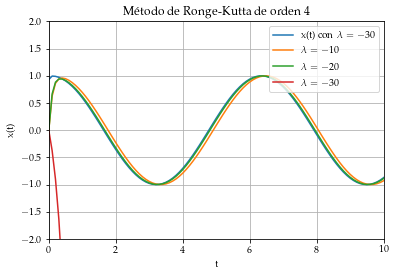

In [100]:

def f1(t,y):    # f(t,y)
    a = -10
    return a*y + np.sin(t) - a*np.cos(t)

def f2(t,y):
    a = -20
    return a*y + np.sin(t) - a*np.cos(t)


def f3(t,y):
    a = -30
    return a*y + np.sin(t) - a*np.cos(t)


def fun4(t):   # Sulución analítica de la ED
    a = -30
    y = (a**2 - 1)*np.cos(t) - 2*a*np.sin(t) + 2*a*np.exp(a*t)
    return y/(a**2 + 1)





R1 = Runge_Kutta_4(0.0, 10.0, 0.1, 0.0, f1) 

R2 = Runge_Kutta_4(0.0, 10.0, 0.1, 0.0, f2) 

R3 = Runge_Kutta_4(0.0, 10.0, 0.1, 0.0, f3)   





# Resultados:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(-2,2)
plt.xlim(0, 10)



plt.plot(E1[0],fun4(np.array(E1[0])),label=' x(t) \mbox{con} $\lambda=-30$') 


plt.plot(R1[0],R1[1],label='$\lambda=-10$') 
plt.plot(R2[0],R2[1],label='$\lambda=-20$') 
plt.plot(R3[0],R3[1],label='$\lambda=-30$') 




plt.title("Método de Ronge-Kutta de orden 4")
plt.legend()


plt.savefig("Examen_Kutta_2.jpeg")


plt.show() 

## Gráficas de la solución analítica  

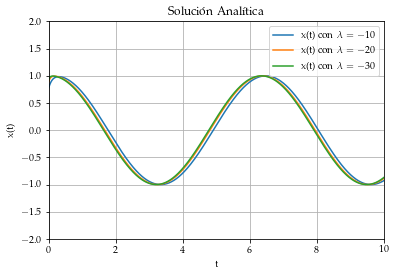

In [109]:

def fun10(t):   # Sulución analítica de la ED
    a = -10
    y = (a**2 - 1)*np.cos(t) - 2*a*np.sin(t) + 2*a*np.exp(a*t)
    return y/(a**2 + 1)

def fun20(t):   # Sulución analítica de la ED
    a = -20
    y = (a**2 - 1)*np.cos(t) - 2*a*np.sin(t) + 2*a*np.exp(a*t)
    return y/(a**2 + 1)

def fun30(t):   # Sulución analítica de la ED
    a = -30
    y = (a**2 - 1)*np.cos(t) - 2*a*np.sin(t) + 2*a*np.exp(a*t)
    return y/(a**2 + 1)


# Resultados:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(-2,2)
plt.xlim(0, 10)



plt.plot(E1[0],fun10(np.array(E1[0])),label=' x(t) \mbox{con} $\lambda=-10$') 
plt.plot(E1[0],fun20(np.array(E1[0])),label=' x(t) \mbox{con} $\lambda=-20$') 
plt.plot(E1[0],fun30(np.array(E1[0])),label=' x(t) \mbox{con} $\lambda=-30$') 




plt.title("Solución Analítica")

plt.legend()

plt.savefig("Examen_sol_analitica.jpeg")


plt.show() 



## Comparación de los resultados para el método de Euler con $h = 0.01$ y $\lambda = -10, -20, -30$

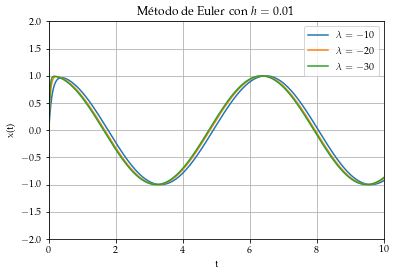

In [104]:

def f1(t,y):
    a = -10
    return a*y + np.sin(t) - a*np.cos(t)

def f2(t,y):
    a = -20
    return a*y + np.sin(t) - a*np.cos(t)


def f3(t,y):
    a = -30
    return a*y + np.sin(t) - a*np.cos(t)


def fun4(t):   # Sulución analítica de la ED
    a = -20
    y = (a**2 - 1)*np.cos(t) - 2*a*np.sin(t) + 2*a*np.exp(a*t)
    return y/(a**2 + 1)



E1 = EDO_Euler(0.0, 10.0, 0.01, 0.0, f1) 

E2 = EDO_Euler(0.0, 10.0, 0.01, 0.0, f2) 

E3 = EDO_Euler(0.0, 10.0, 0.01, 0.0, f3)   






# Resultados:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(-2,2)
plt.xlim(0, 10)

plt.plot(E1[0],E1[1],label='$\lambda=-10$') 
plt.plot(E2[0],E2[1],label='$\lambda=-20$') 
plt.plot(E3[0],E3[1],label='$\lambda=-30$') 

#plt.plot(E1[0],fun4(np.array(E1[0])),label=' x(t) \mbox{con} $\lambda=-20$') 


plt.title("Método de Euler con $h = 0.01$")

plt.legend()
plt.savefig("Examen_Euler3.jpeg")


plt.show() 

## Comparación de los resultados para el método de Runge-Kutta con $h =0.01$ y $\lambda = -10, -20, -30$

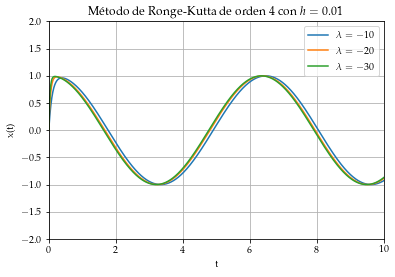

In [107]:

def f1(t,y):    # f(t,y)
    a = -10
    return a*y + np.sin(t) - a*np.cos(t)

def f2(t,y):
    a = -20
    return a*y + np.sin(t) - a*np.cos(t)


def f3(t,y):
    a = -30
    return a*y + np.sin(t) - a*np.cos(t)


def fun4(t):   # Sulución analítica de la ED
    a = -30
    y = (a**2 - 1)*np.cos(t) - 2*a*np.sin(t) + 2*a*np.exp(a*t)
    return y/(a**2 + 1)





R1 = Runge_Kutta_4(0.0, 10.0, 0.01, 0.0, f1) 

R2 = Runge_Kutta_4(0.0, 10.0, 0.01, 0.0, f2) 

R3 = Runge_Kutta_4(0.0, 10.0, 0.01, 0.0, f3)   





# Resultados:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(-2,2)
plt.xlim(0, 10)



#plt.plot(E1[0],fun4(np.array(E1[0])),label=' x(t) \mbox{con} $\lambda=-30$') 


plt.plot(R1[0],R1[1],label='$\lambda=-10$') 
plt.plot(R2[0],R2[1],label='$\lambda=-20$') 
plt.plot(R3[0],R3[1],label='$\lambda=-30$') 




plt.title("Método de Ronge-Kutta de orden 4 con $h=0.01$")
plt.legend()


plt.savefig("Examen_Kutta_3.jpeg")


plt.show() 